# Parameter fitting

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# global settings for plots
plt.rcParams.update({
    'axes.labelsize': 'large',
    'axes.labelweight': 'bold',
    'axes.titlesize': 'medium',
    'axes.titleweight': 'bold',
    'legend.fontsize': 'small',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'figure.facecolor': '1.00'
})

## 1. Particle Swarm Optimization (PSO)

Particle swarm optimization solves a problem by 
- having a population of candidate solutions, here dubbed particles
- moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity. 
- Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles.

<img src="./fitting/particleswarm.gif">

https://en.wikipedia.org/wiki/Particle_swarm_optimization

- PSO is a metaheuristic: makes few or no assumptions about the problem being optimized
- can search very large spaces of candidate solutions. 
- However, metaheuristics such as PSO do not guarantee an optimal solution is ever found. 
- PSO does not use the gradient of the problem being optimized, which means PSO does not require that the optimization problem be differentiable as is required by classic optimization methods such as gradient descent and quasi-newton methods. 

## 2. Steepest descent (gradient descent)
In the following example we apply the gradient descent algorithm to find a local minima in a 1 dimensional function:


Function $F{(x)}=x^{4}-3x^{3}+2$, 

with derivative $F'{(x)}=4x^{3}-9x^{2}$ 

and second derivative $F''{(x)}=12x^{2}-18x$

https://en.wikipedia.org/wiki/Gradient_descent

### 2.1 Analytical solution
We can easily calculate the minima analytically via $F(x)=0$ as $x_1=0$ and $x_2=9/4=2.25$.

$F''{(x_2)} = 12 \cdot (9/4)^2 - 18 \cdot 9/4 =20.25> 0$

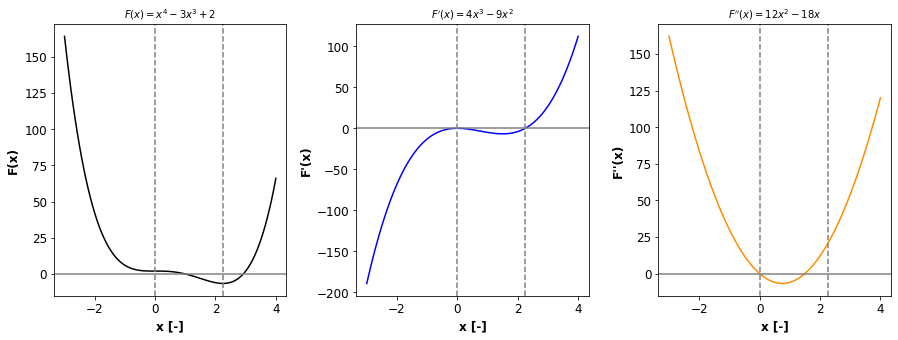

In [3]:
# calculate functions
x = np.linspace(-3, 4, num=100)
F = np.power(x, 4) - 3*np.power(x, 3) +2
Fdx = 4*np.power(x, 3) - 9*np.power(x, 2)
Fdx2 = 12*np.power(x, 2) - 18*x

# figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.subplots_adjust(wspace=0.3)

ax1.set_title("$F(x)= x^4 -3x^3 +2$")
ax1.set_ylabel("F(x)")
ax2.set_title("$F'(x)= 4x^3 -9x^2$")
ax2.set_ylabel("F'(x)")
ax3.set_title("$F''(x)= 12x^2 -18x$")
ax3.set_ylabel("F''(x)")

ax1.plot(x, F, color="black", label="F(x)")
ax2.plot(x, Fdx, color="blue", label="F'(x)")
ax3.plot(x, Fdx2, color="darkorange", label="F''(x)")
for ax in (ax1, ax2, ax3):
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray", linestyle="--")
    ax.axvline(9/4, color="gray", linestyle="--")

for ax in (ax1, ax2, ax3):
    ax.set_xlabel("x [-]")
    
plt.show()

### 2.2 Numerical calculation
Now we implement a simple gradient descent algorithm to find the minimas numerically

In [4]:
x_new = 6.0  # The algorithm starts at x=6
gamma = 0.01  # step size multiplier
precision = 0.00001  # stop criteria
max_iters = 10000  # maximum number of iterations (stop criteria)

# definition of functions
fun = lambda x: np.power(x,4) - 3*np.power(x,3) + 2
df = lambda x: 4 * np.power(x,3) - 9 * np.power(x, 2)

# running algorithm
k = 0  # iteration counter
previous_step_size = 1 
x_vals = [x_new]
print(f"Start, {x_new}")
while previous_step_size > precision and k < max_iters:
    x_old = x_new
    
    # update with stepsize and gradient
    x_new -= gamma * df(x_old)
    
    # calculate precision (change)
    previous_step_size = abs(x_new - x_old)
    
    # update counters
    k += 1
    print(f"Step {k}, {x_new}")
    x_vals.append(x_new)

print("The local minimum occurs at", x_new)

Start, 6.0
Step 1, 0.5999999999999996
Step 2, 0.6237599999999996
Step 3, 0.6490692731402646
Step 4, 0.6760475763767438
Step 5, 0.704821965498881
Step 6, 0.7355261366038248
Step 7, 0.7682992721113444
Step 8, 0.8032842278686305
Step 9, 0.840624861847519
Step 10, 0.8804622684298664
Step 11, 0.9229296507309586
Step 12, 0.9681455460305634
Step 13, 1.016205130521792
Step 14, 1.067169389942697
Step 15, 1.1210520795330405
Step 16, 1.1778046421472836
Step 17, 1.237299637824332
Step 18, 1.2993137782331108
Step 19, 1.3635123370474889
Step 20, 1.429437442158506
Step 21, 1.4965033788967752
Step 22, 1.5640022802344904
Step 23, 1.6311231270849003
Step 24, 1.6969855549473505
Step 25, 1.7606875094969714
Step 26, 1.821362659674955
Step 27, 1.8782404675959476
Step 28, 1.930700009196379
Step 29, 1.9783089472809865
Step 30, 2.0208417065692057
Step 31, 2.0582751831448975
Step 32, 2.090764845528107
Step 33, 2.118607415721545
Step 34, 2.1421976265432066
Step 35, 2.1619858762300224
Step 36, 2.178441640823547
S

(-10, 10)

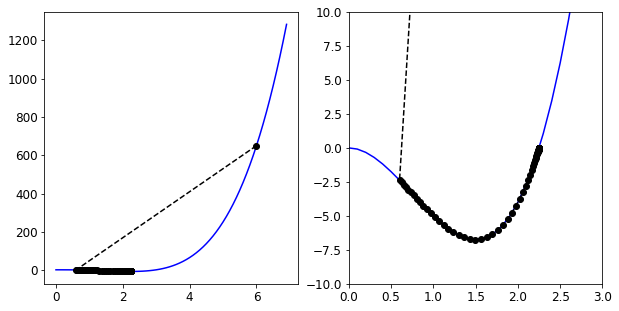

In [5]:
x_vals = np.array(x_vals)
x_range = np.arange(0,7,0.1)

from matplotlib import pyplot as plt
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(x_range, fun(x_range), '-', color="blue", label="f")
ax1.plot(x_vals, fun(x_vals), 'o--', color="black")
ax2.plot(x_range, df(x_range), '-', color="blue", label="df")
ax2.plot(x_vals, df(x_vals), 'o--', color="black", label="df")
ax2.set_xlim(0, 3.0)
ax2.set_ylim(-10, 10)

Gradient descent has problems with pathological functions (zig-zag behavior)
The "Zig-Zagging" nature of the method is also evident below, where the gradient descent method is applied to $F\left(x,y\right)=\sin \left({\frac {1}{2}}x^{2}-{\frac {1}{4}}y^{2}+3\right)\cos \left(2x+1-e^{y}\right)$. 

<img src="./fitting/gradient_zigzag.png" width="500"/>

## 3. Model fitting
Multiple tools for parameter fitting in models exist. Most of these tools can work with models in SBML description.
Examples are
- COPASI (http://copasi.org/, http://copasi.org/Support/User_Manual/Tasks/Parameter_Estimation/)
- data2dynamics (https://github.com/Data2Dynamics/d2d)
- pyPESTO (with AMICI) (https://pypesto.readthedocs.io)
- AMICI (https://github.com/ICB-DCM/AMICI)

In the following we are running some example parameter fits with pyPESTO and AMICI.

For installation of AMICI the following is required
```
sudo apt-get install libatlas-base-dev
sudo apt-get install libhdf5-dev libhdf5-serial-dev
```

### 3.1 Example model (conversion reaction)
For our example we use a simple model with a single reversible conversion reaction
with mass-action kinetics
```
R1: A <-> B; v = R1_k1 * A - R1_k2*B
```
The model is available as SBML model which we will use in the following for simulation and parameter fitting.

In [18]:
import tellurium as te
model = te.loads(sbml_file)
print(te.sbmlToAntimony(model.getSBML()))

// Created by libAntimony v2.11.0
model *New_Model()

  // Compartments and Species:
  compartment compartment_;
  species A in compartment_, B in compartment_;

  // Reactions:
  R1: A -> B; compartment_*(R1_k1*A - R1_k2*B);

  // Species initializations:
  A = 1;
  A has substance_per_volume;
  B = 0;
  B has substance_per_volume;

  // Compartment initializations:
  compartment_ = 1;
  compartment_ has volume;

  // Variable initializations:
  R1_k1 = 0.3;
  R1_k2 = 0.5;

  // Other declarations:
  const compartment_;

  // Unit definitions:
  unit length = metre;
  unit area = metre^2;
  unit volume = 1e-3 litre;
  unit time_unit = time_unit;
  unit substance = 1e-3 mole;
  unit extent = substance;
  unit substance_per_volume = 1e-3 mole / 1e-3 litre;

  // Display Names:
  time_unit is "time";
end

New_Model is "New Model"



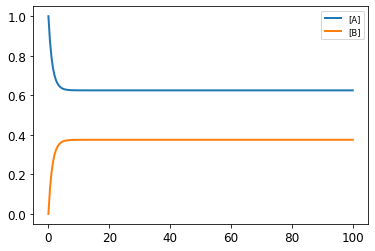

In [19]:
s = model.simulate(start=0, end=100, steps=200)
model.plot(s)

### 3.2 Compile AMICI model
Parameter fitting is numerically very expensive so the model is compiled to C++ code with AMICI.

In [ ]:
###
import importlib
import os
import sys
import numpy as np
import amici
import amici.plotting
import pypesto

# sbml file we want to import
sbml_file = './fitting/model_conversion_reaction.xml'
# name of the model that will also be the name of the python module
model_name = 'model_conversion_reaction'
# directory to which the generated model code is written
model_output_dir = 'fitting/' + model_name

# import sbml model, compile and generate amici module
sbml_importer = amici.SbmlImporter(sbml_file)
sbml_importer.sbml2amici(model_name,
                         model_output_dir,
                         verbose=False)